# Visualizing data

In this notebook we will be visualizing the data that we have gathered while experimenting with different parameters for our Rabbit and Fox model. You will come up with your own research question and answer it by analyzing plots that you make on your own.

In the previous step, we have generated a large number of CSV files, each containing the results of many repetitions of a specific experiment configuration. 

In the cell below, we have provided you with a function to read and aggregate data from multiple CSV files. `read_and_aggregate_data_from_dir()` takes a directory path containing CSV files and a list of aggregation functions as its input and returns a pandas DataFrame that aggregates the data from those files.

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

def read_and_aggregate_data_from_dir(data_dir, aggregators, columns=['Rabbits', 'Foxes']):
    """
    Reads and aggregates data from all files in `data_dir` and applies the functions in 
    `aggregators` to `columns`. By default, this will be applied to the columns 'Rabbits' 
    and 'Foxes'.
    
    Outputs a DataFrame in which every row is the aggregated value for a single file in 
    `data_dir`. Values get copied from the first entry of the csv, except for the values
    in `columns`, which are excluded. New columns are generated for each combination of
    aggregation function in `aggregators` and `columns`.
    """
    
    file_names = os.listdir(data_dir)

    df = pd.DataFrame()
    for file_name in file_names:
        exp_df = pd.read_csv(f'{data_dir}/{file_name}')

        # apply the aggregators to the desired columns
        agg_df = exp_df[columns].aggregate(aggregators)

        # transform the resulting dataframe to a dataframe with one single row
        agg_row_df = agg_df.unstack().to_frame().T
        agg_row_df.columns = [f'{col}_{agg}' for col, agg in agg_row_df.columns]

        # find the other columns and select the first available value as default
        other_column_names = [c for c in exp_df.columns if c not in columns]
        other_columns = exp_df.loc[[0], other_column_names]

        # rejoin the aggregated columns with the other data, creating a single row
        agg_row = other_columns.join(agg_row_df)

        # add the aggregated row to the output dataframe
        df = pd.concat([df, agg_row], ignore_index=True)

    return df

### Using the function

To use this function, simply call it and provide the directory path where your CSV files are located, as well as a list of aggregation functions you want to use. The function will read in all CSV files in the directory, apply the specified aggregators to the desired columns, and return a pandas DataFrame with the aggregated results.

In the cell below you can find an example of generating a Dataframe where we use `np.sum` to add all the values for each CSV in the directory `'data'`. 

In [2]:
aggregators = [np.sum]
df = read_and_aggregate_data_from_dir('data', aggregators)

display(df)

,iterations,number_of_rabbits,number_of_foxes,birthrate_rabbits,birthrate_foxes,max_creatures,Rabbits_sum,Foxes_sum
0,100,10,3,0.15,0.15,50,1910,385
1,200,10,3,0.05,0.05,50,680,73
2,200,10,3,0.05,0.15,50,544,255
3,200,10,3,0.05,0.10,50,659,108
4,200,10,3,0.05,0.25,50,425,939
...,...,...,...,...,...,...,...,...
96,200,10,3,0.50,0.35,50,3644,867
97,200,10,3,0.50,0.30,50,3939,594
98,200,10,3,0.50,0.45,50,3685,1035
99,200,10,3,0.50,0.40,50,3681,1078


### Answering questions

We can use this data to answer a research question: *Does the number of rabbits at the end of a simulation increase as the birthrate increases?*

We have included an example that shows you how to generate a simple plot below.

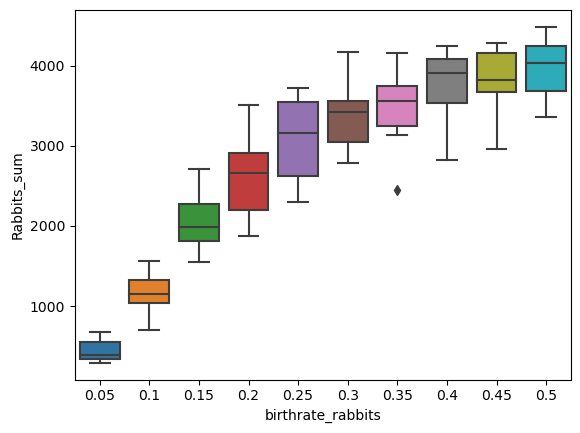

In [3]:
sns.boxplot(df, x='birthrate_rabbits', y='Rabbits_sum')
plt.show()

This boxplot shows that as the birthrate of the Rabbits increases, the number of Rabbits also increases; answering our research question. We can also see that there is high variance in the number of Rabbits. 

A hypothesis for the observed variance in the total number of Rabbits could be: *This is caused by the different possible values for the birthrates of the Foxes*. Which can be proven by analysing the plot below.

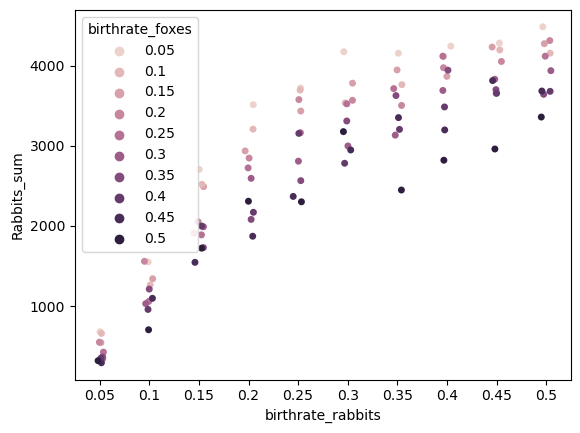

In [4]:
sns.stripplot(df, x='birthrate_rabbits', y='Rabbits_sum', hue='birthrate_foxes', legend='full')
plt.show()

This stripplot can be used to confirm that as the birthrate of the Foxes increases, the total number of Rabbits decreases. 

### Doing research

Now it is up to you to come up with your own research question that you can answer by creating interesting figures. **In the cells at the bottom of this notebook, clearly state your research questions and hypotheses. For each of your figures, explain what is shown and what can be concluded from the figure. If you make additions to the code of `phase9.py` or do additional experiments to get more data, clearly list and explain what these envolve.**

Select a topic. You could, for example, try to find a combination of birthrates for which the population of Rabbits is reasonably stable: i.e., the rabbits don't die out, but they also don't overpopulate the system. Keep in mind that this is a highly chaotic system, you can never guarantee an outcome a 100%. In this case you could define stable as "for around half my experiments there are at least 10 rabbits left at the end of the simulation". In other cases, the foxes ate every single rabbit. 

Be creative! 

> Keep in mind that significantly changing `phase9.py` and doing more experiments might take up a lot of runtime!

### Some help

* Of course just having the sum of all Rabbits and Foxes isn't the most interesting or usefull. It is up to you to find and add good aggregation functions to the list! 
* In some cases you might want to count the number of values that are equal to some value, or use a different aggregation function that is not available directly in numpy or pandas. In that case you can define your own aggregation function! Anything should work, as long as the input for the function is a Series, and the output of the function is a single number:
  ```Python
  def zero_count(data_series):
      return data_series.eq(0).sum()
  aggregators = [np.sum, zero_count]
  ``` 
  This function for example calculates the number of entries that are equal to zero, which might help you define a "win" for either of the species!
* Take a good look at the [Seaborn gallery](https://seaborn.pydata.org/examples/index.html). This page is full of cool examples of plots that you can try out. 
* You are also allowed (*but certainly not required*) to add to the simulation in `phase9.py` and see how your changes affect the dynamics!


**List your research questions and hypotheses below**

YOUR ANSWER HERE

**List and explain any additions to the code.**

YOUR ANSWER HERE

**List and explain any extra experiments you did to get more data.**

YOUR ANSWER HERE